## Abstract

Add project abstract here.

# Question 1
Is it possible to predict a nation's power consumption by considering its population size, gross domestic product (GDP), and the percentage of electricity generated from renewable sources and changes across the years?


In [1]:
#| label: question_part1
#| echo: false

#cell library
import pandas as pd

# Load the dataset
data = pd.read_csv('data/owid-energy-data.csv')

#columns to keep
keep = (['year', 'population', 'gdp', 'electricity_generation', 
      'primary_energy_consumption', 'renewables_electricity'])

#data for q1
q1_data = data[keep]

# Drop rows with any empty values
q1_data_cleaned = q1_data.dropna()

# Save the cleaned dataset to a new CSV file
q1_data_cleaned.to_csv('data/q1_energy_data_cleaned.csv', index=False)

In [2]:
#| label: question_part2
#| echo: false

# Load the dataset
data = pd.read_csv('data/q1_energy_data_cleaned.csv')

# Calculate the percentage of electricity generated from renewable sources
data['renewables_percentage'] = (data['renewables_electricity'] / data['electricity_generation']) * 100

# Standardize or normalize the relevant columns (if needed)
# Since the columns are already of type 'double', normalization might be beneficial
# Here's an example of Min-Max normalization
# You can choose to apply normalization to specific columns as needed

columns_to_normalize = ['electricity_generation', 
                        'primary_energy_consumption', 'renewables_electricity']

for column in columns_to_normalize:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

# Save the updated dataset to a new CSV file
data.to_csv('data/q1_energy_data_processed.csv', index=False)

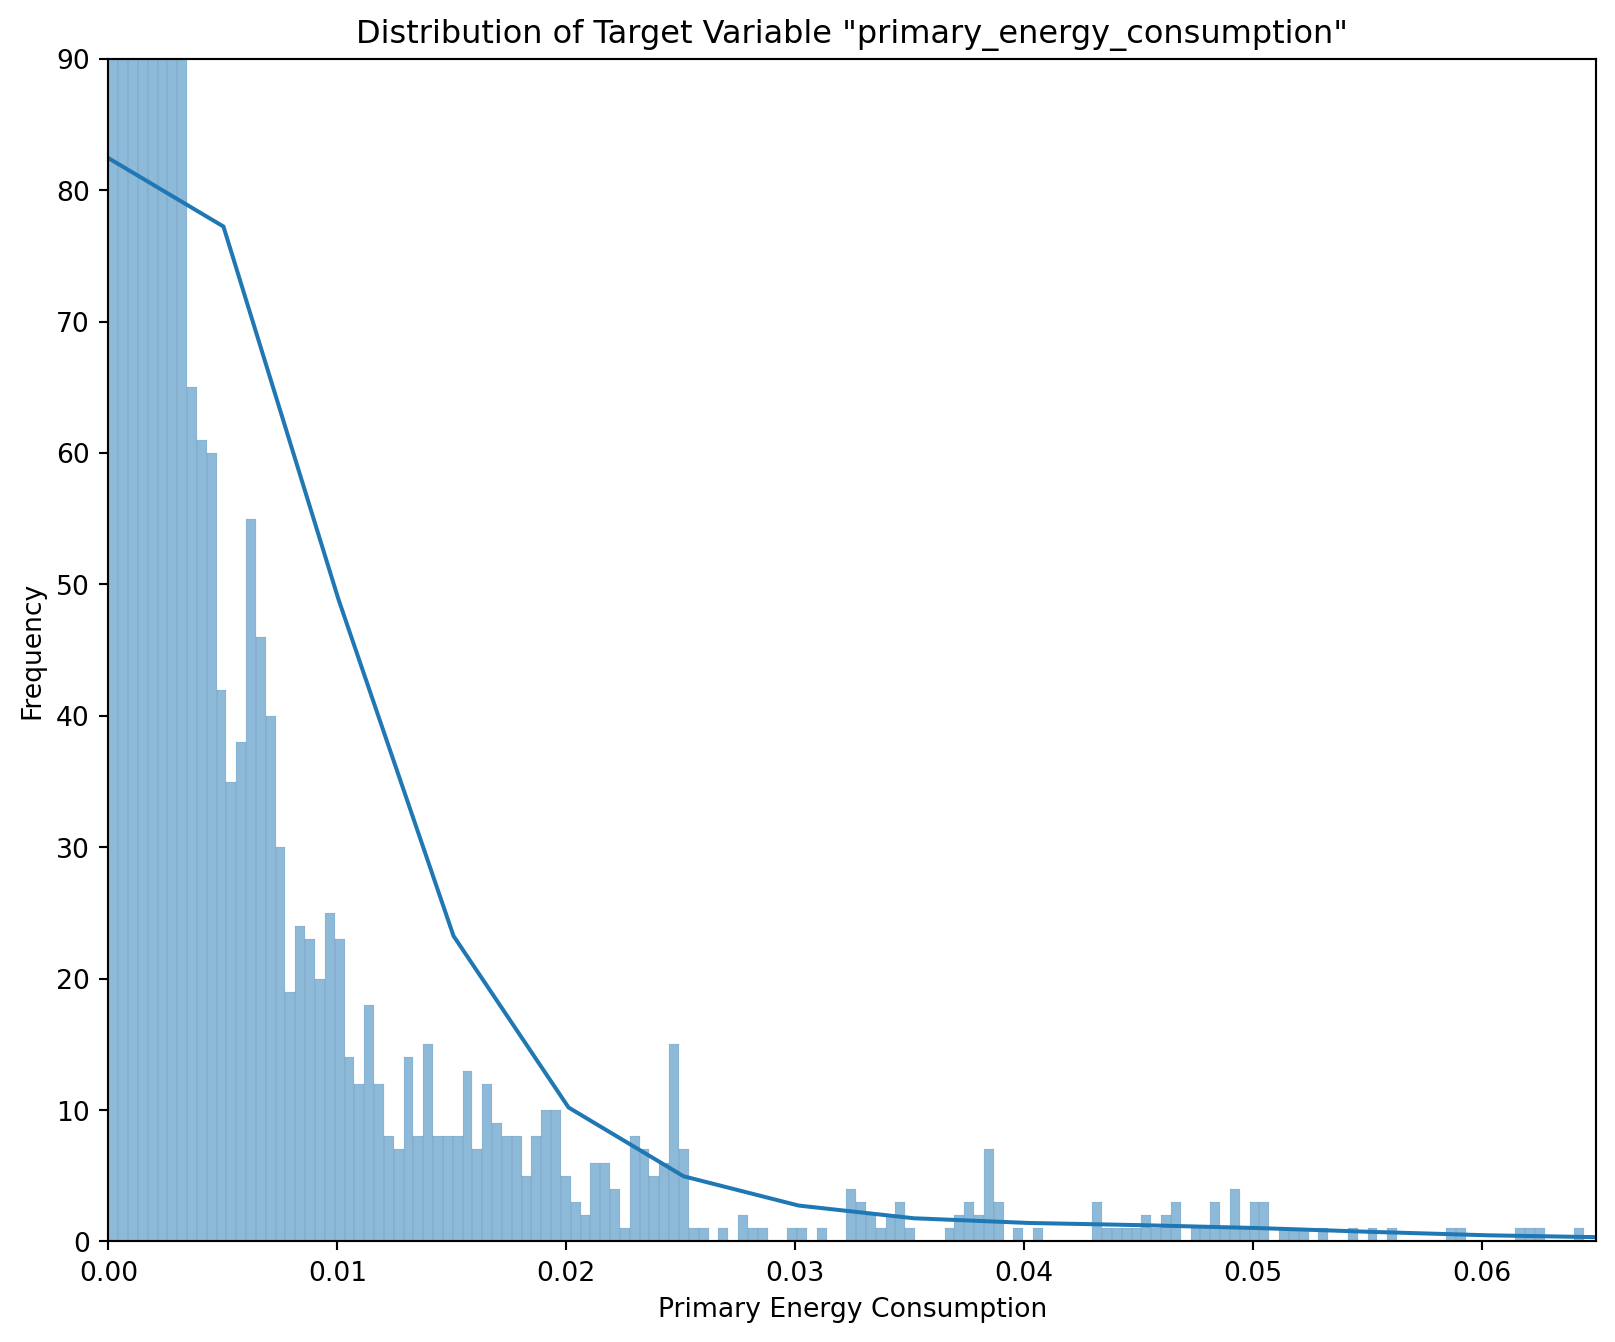

In [3]:
#| label: question_new
#| echo: false

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/q1_energy_data_processed.csv')

plt.figure(figsize=(10, 8))
sns.histplot(data['primary_energy_consumption'], kde=True)
plt.title('Distribution of Target Variable "primary_energy_consumption"')
plt.xlabel('Primary Energy Consumption')
plt.ylabel('Frequency')
plt.xlim(0, 0.065)  # Set x-axis limits
plt.ylim(0, 90)  # Set y-axis limits
plt.show()

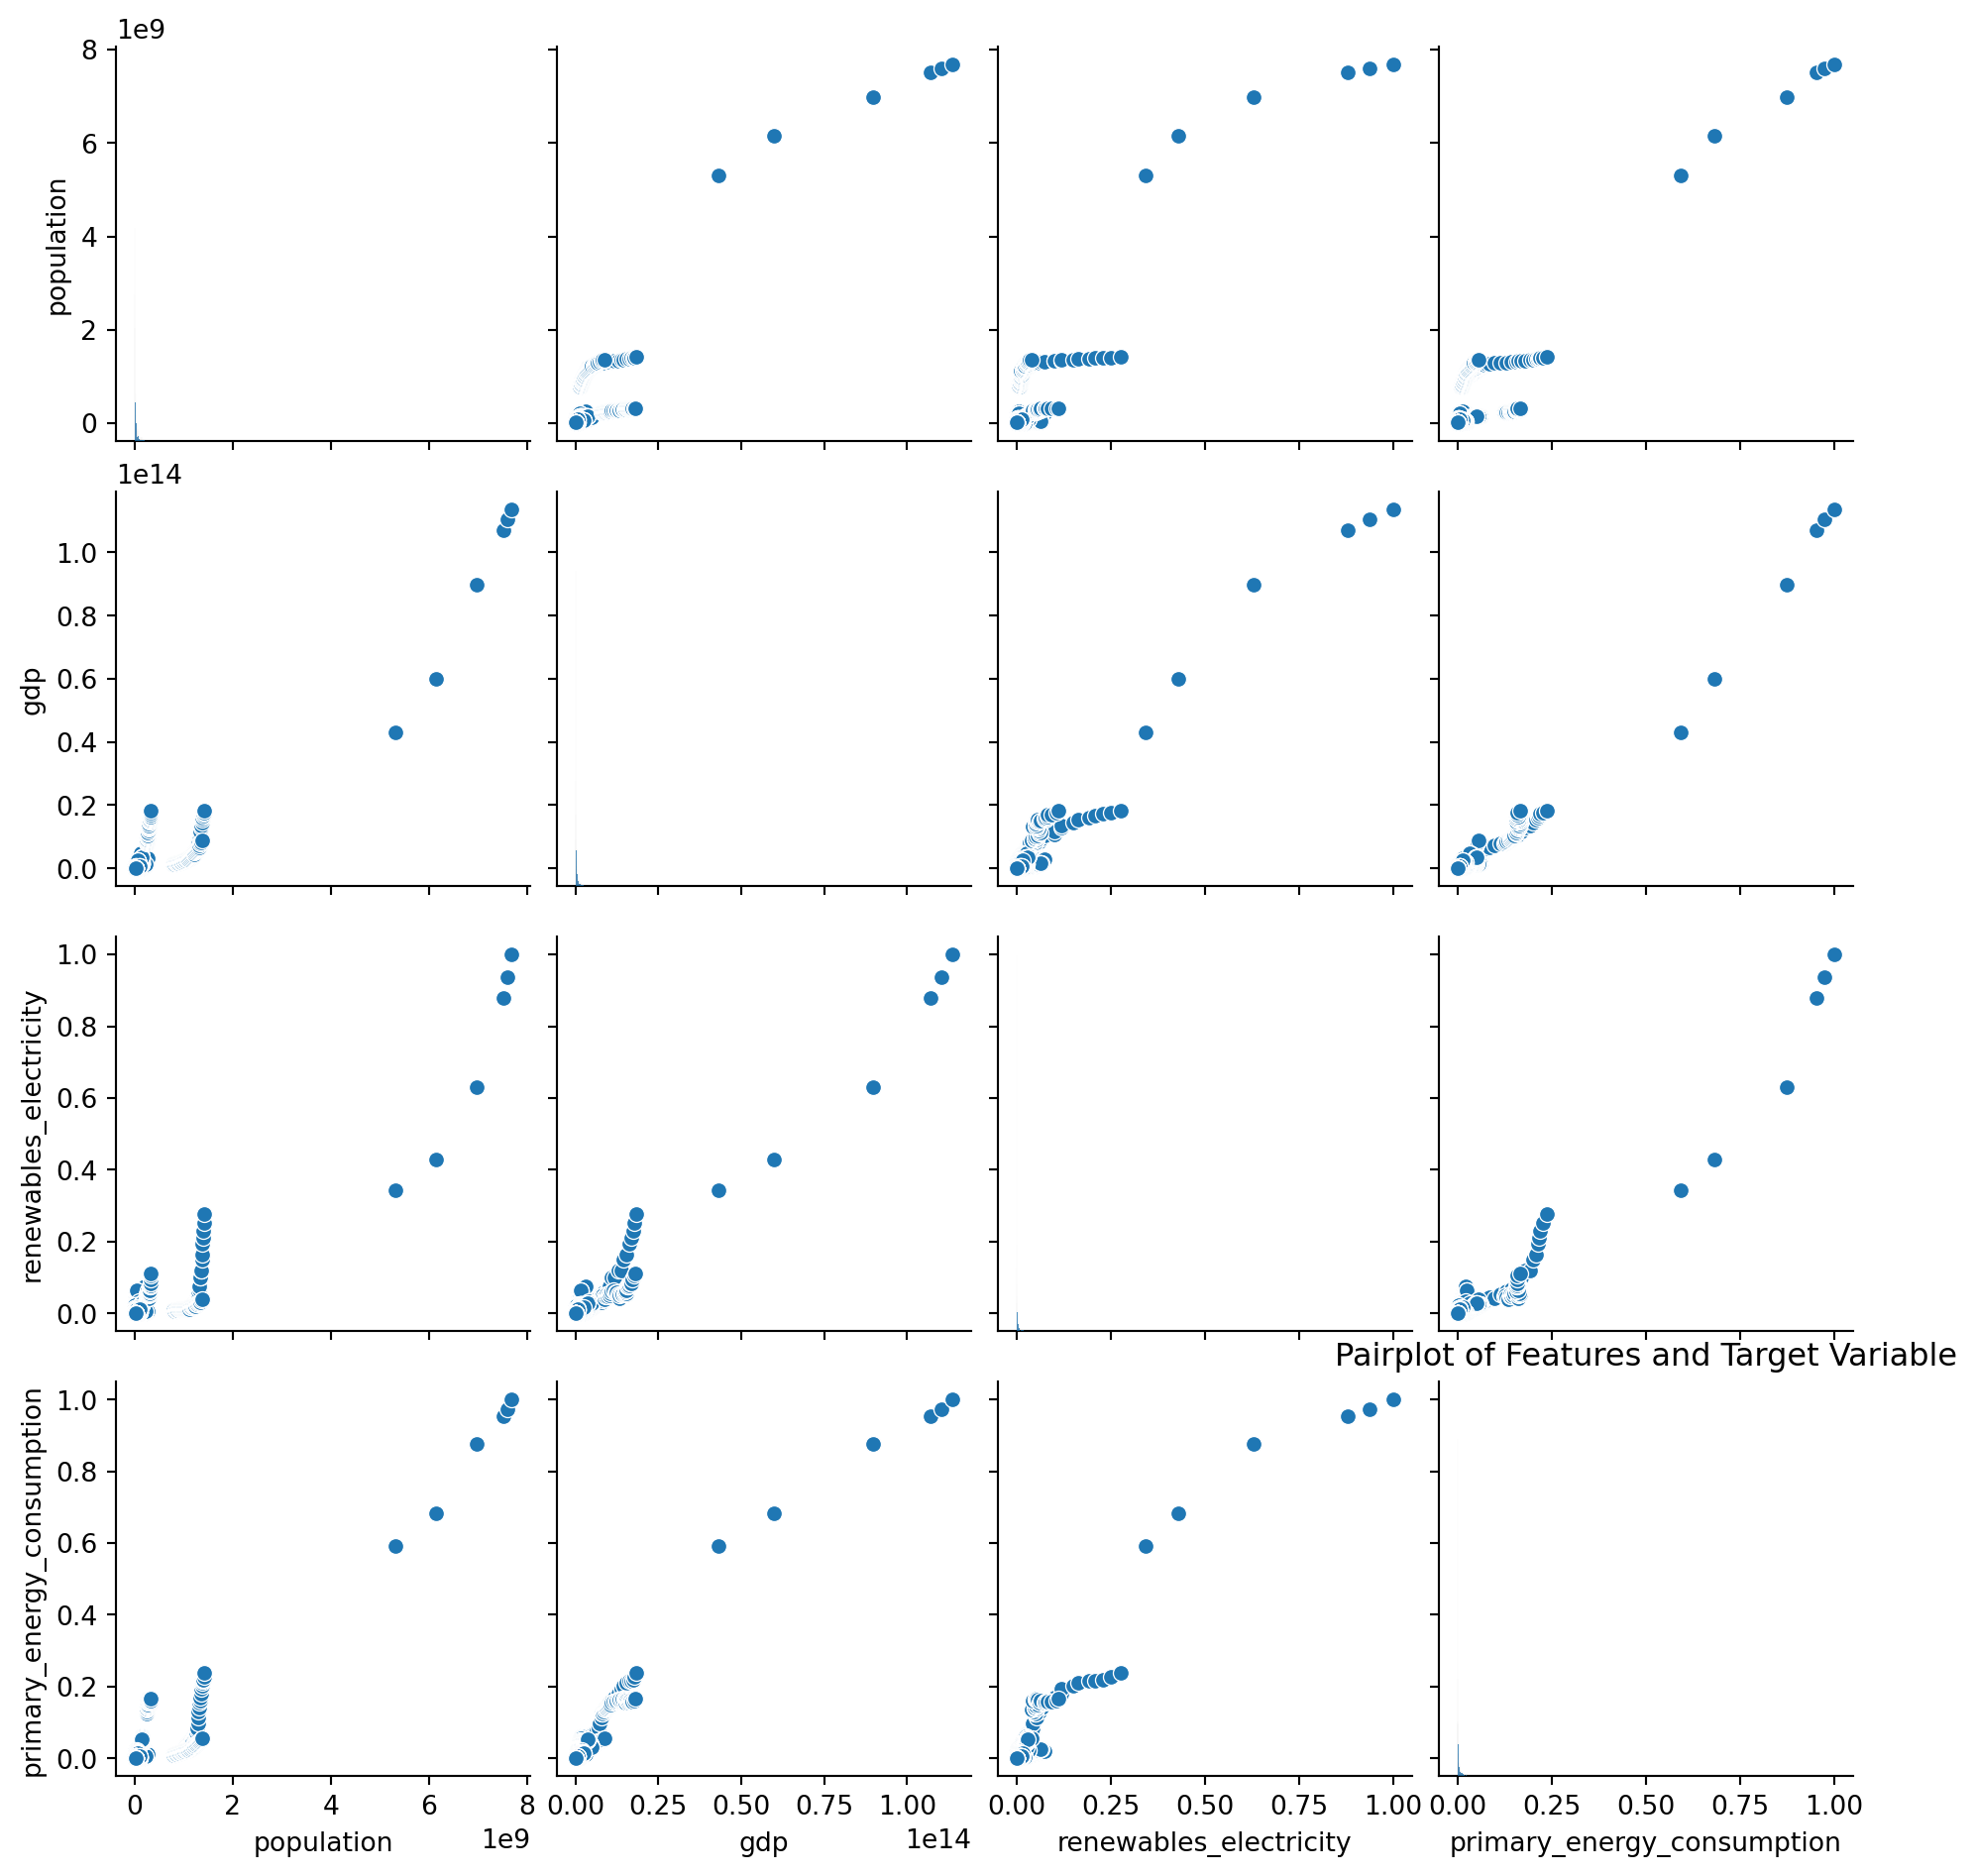

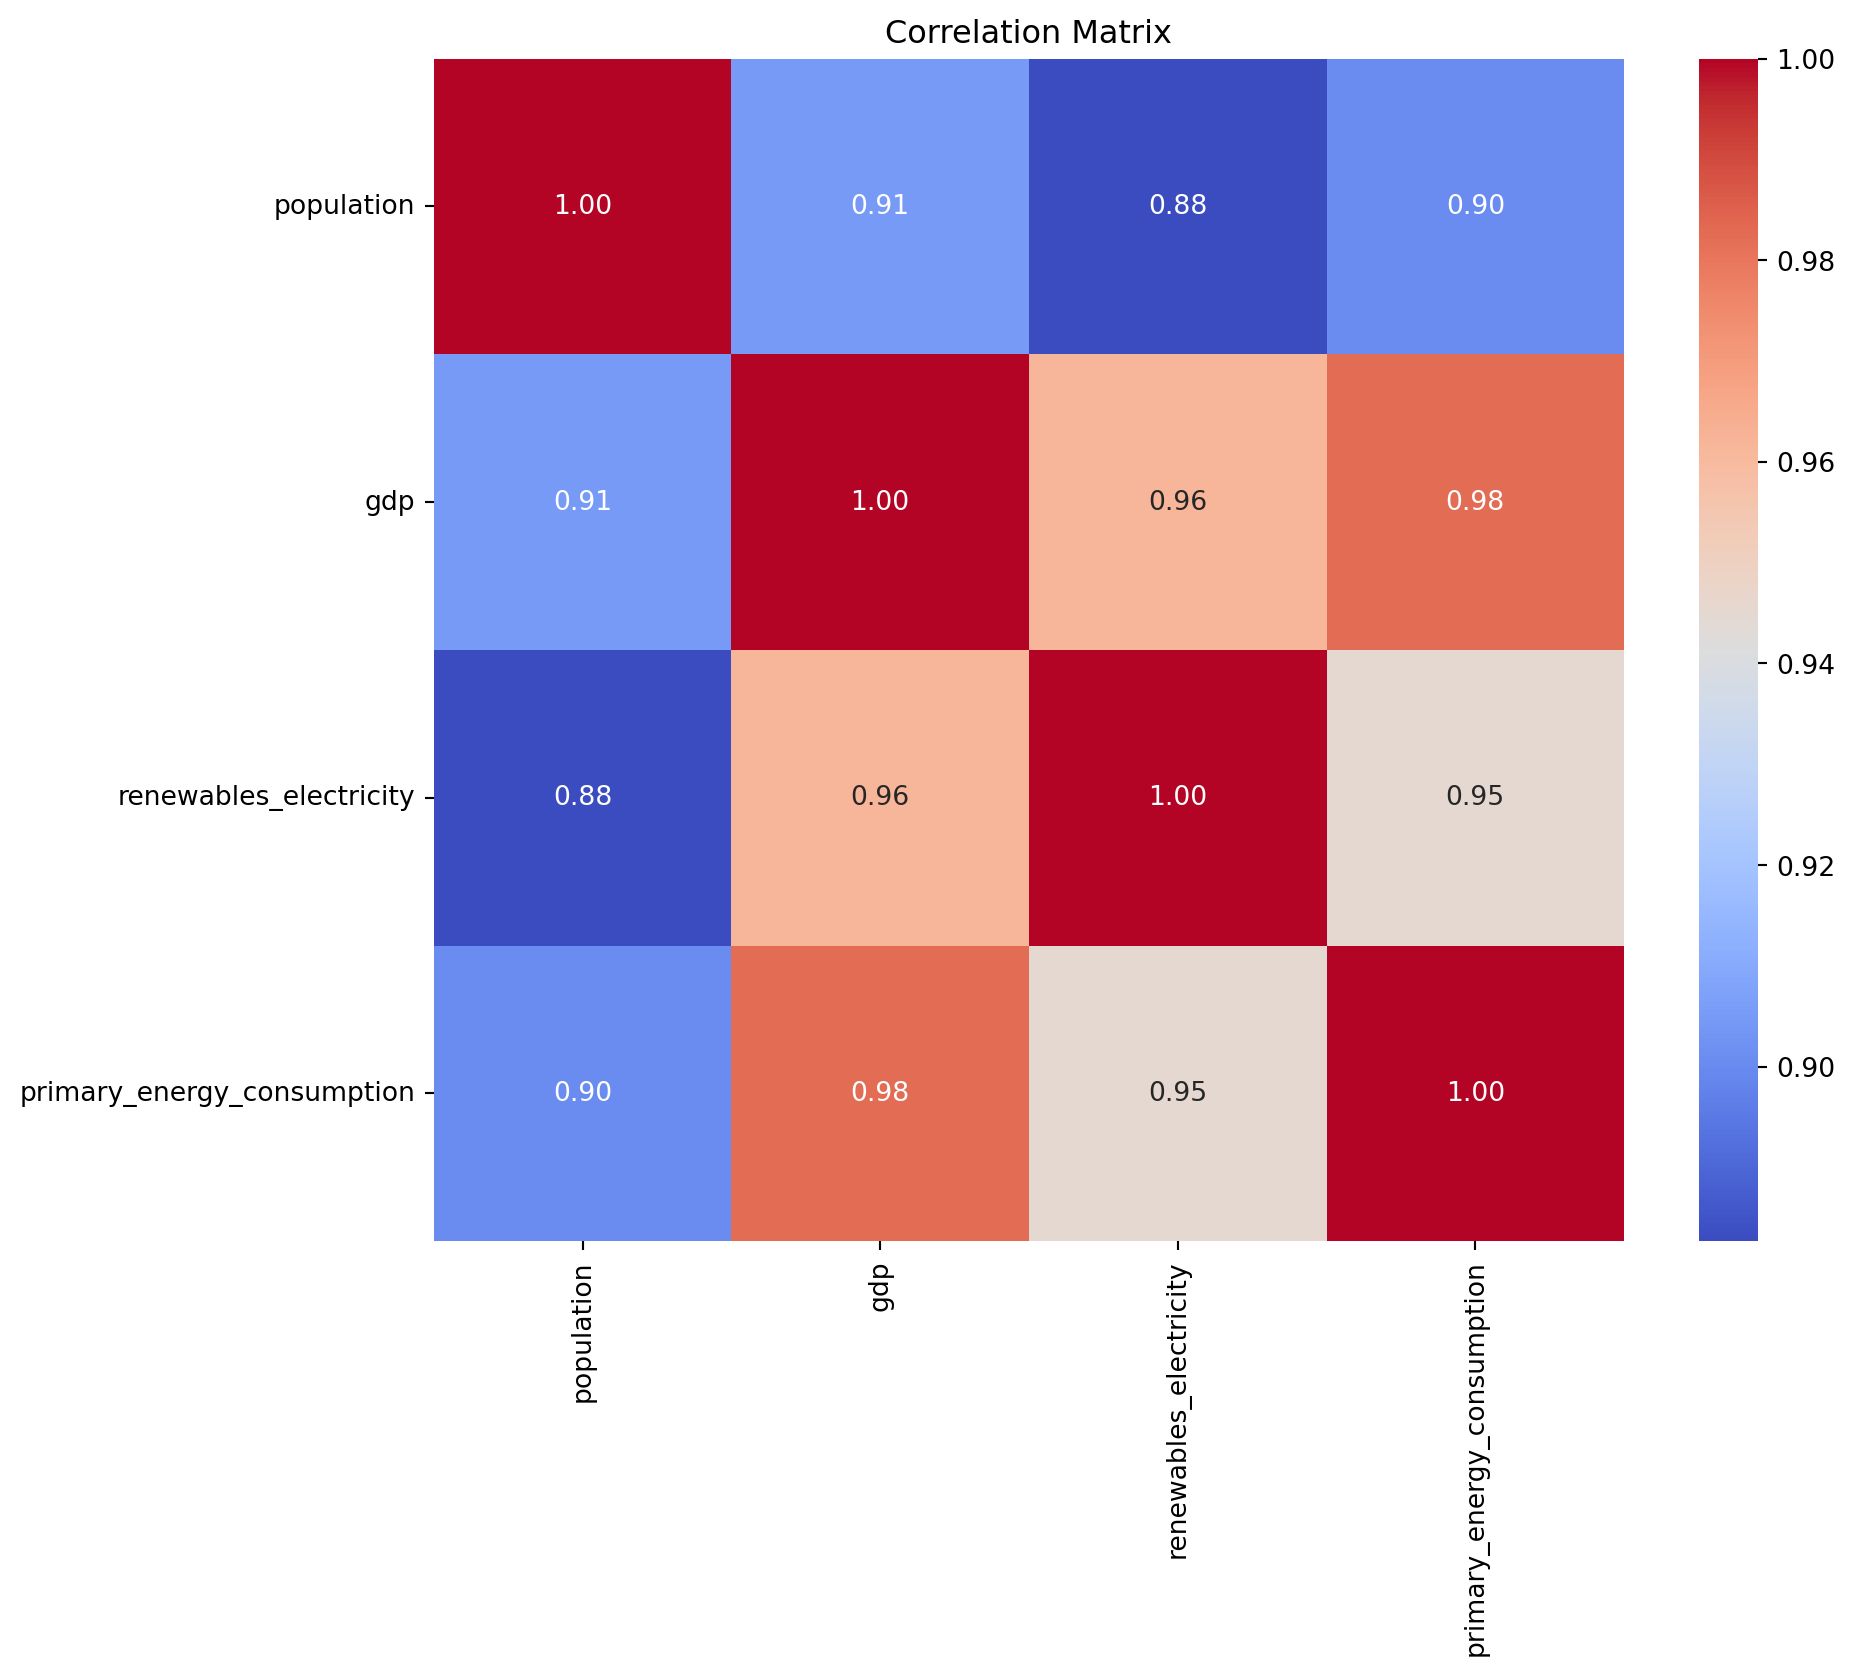

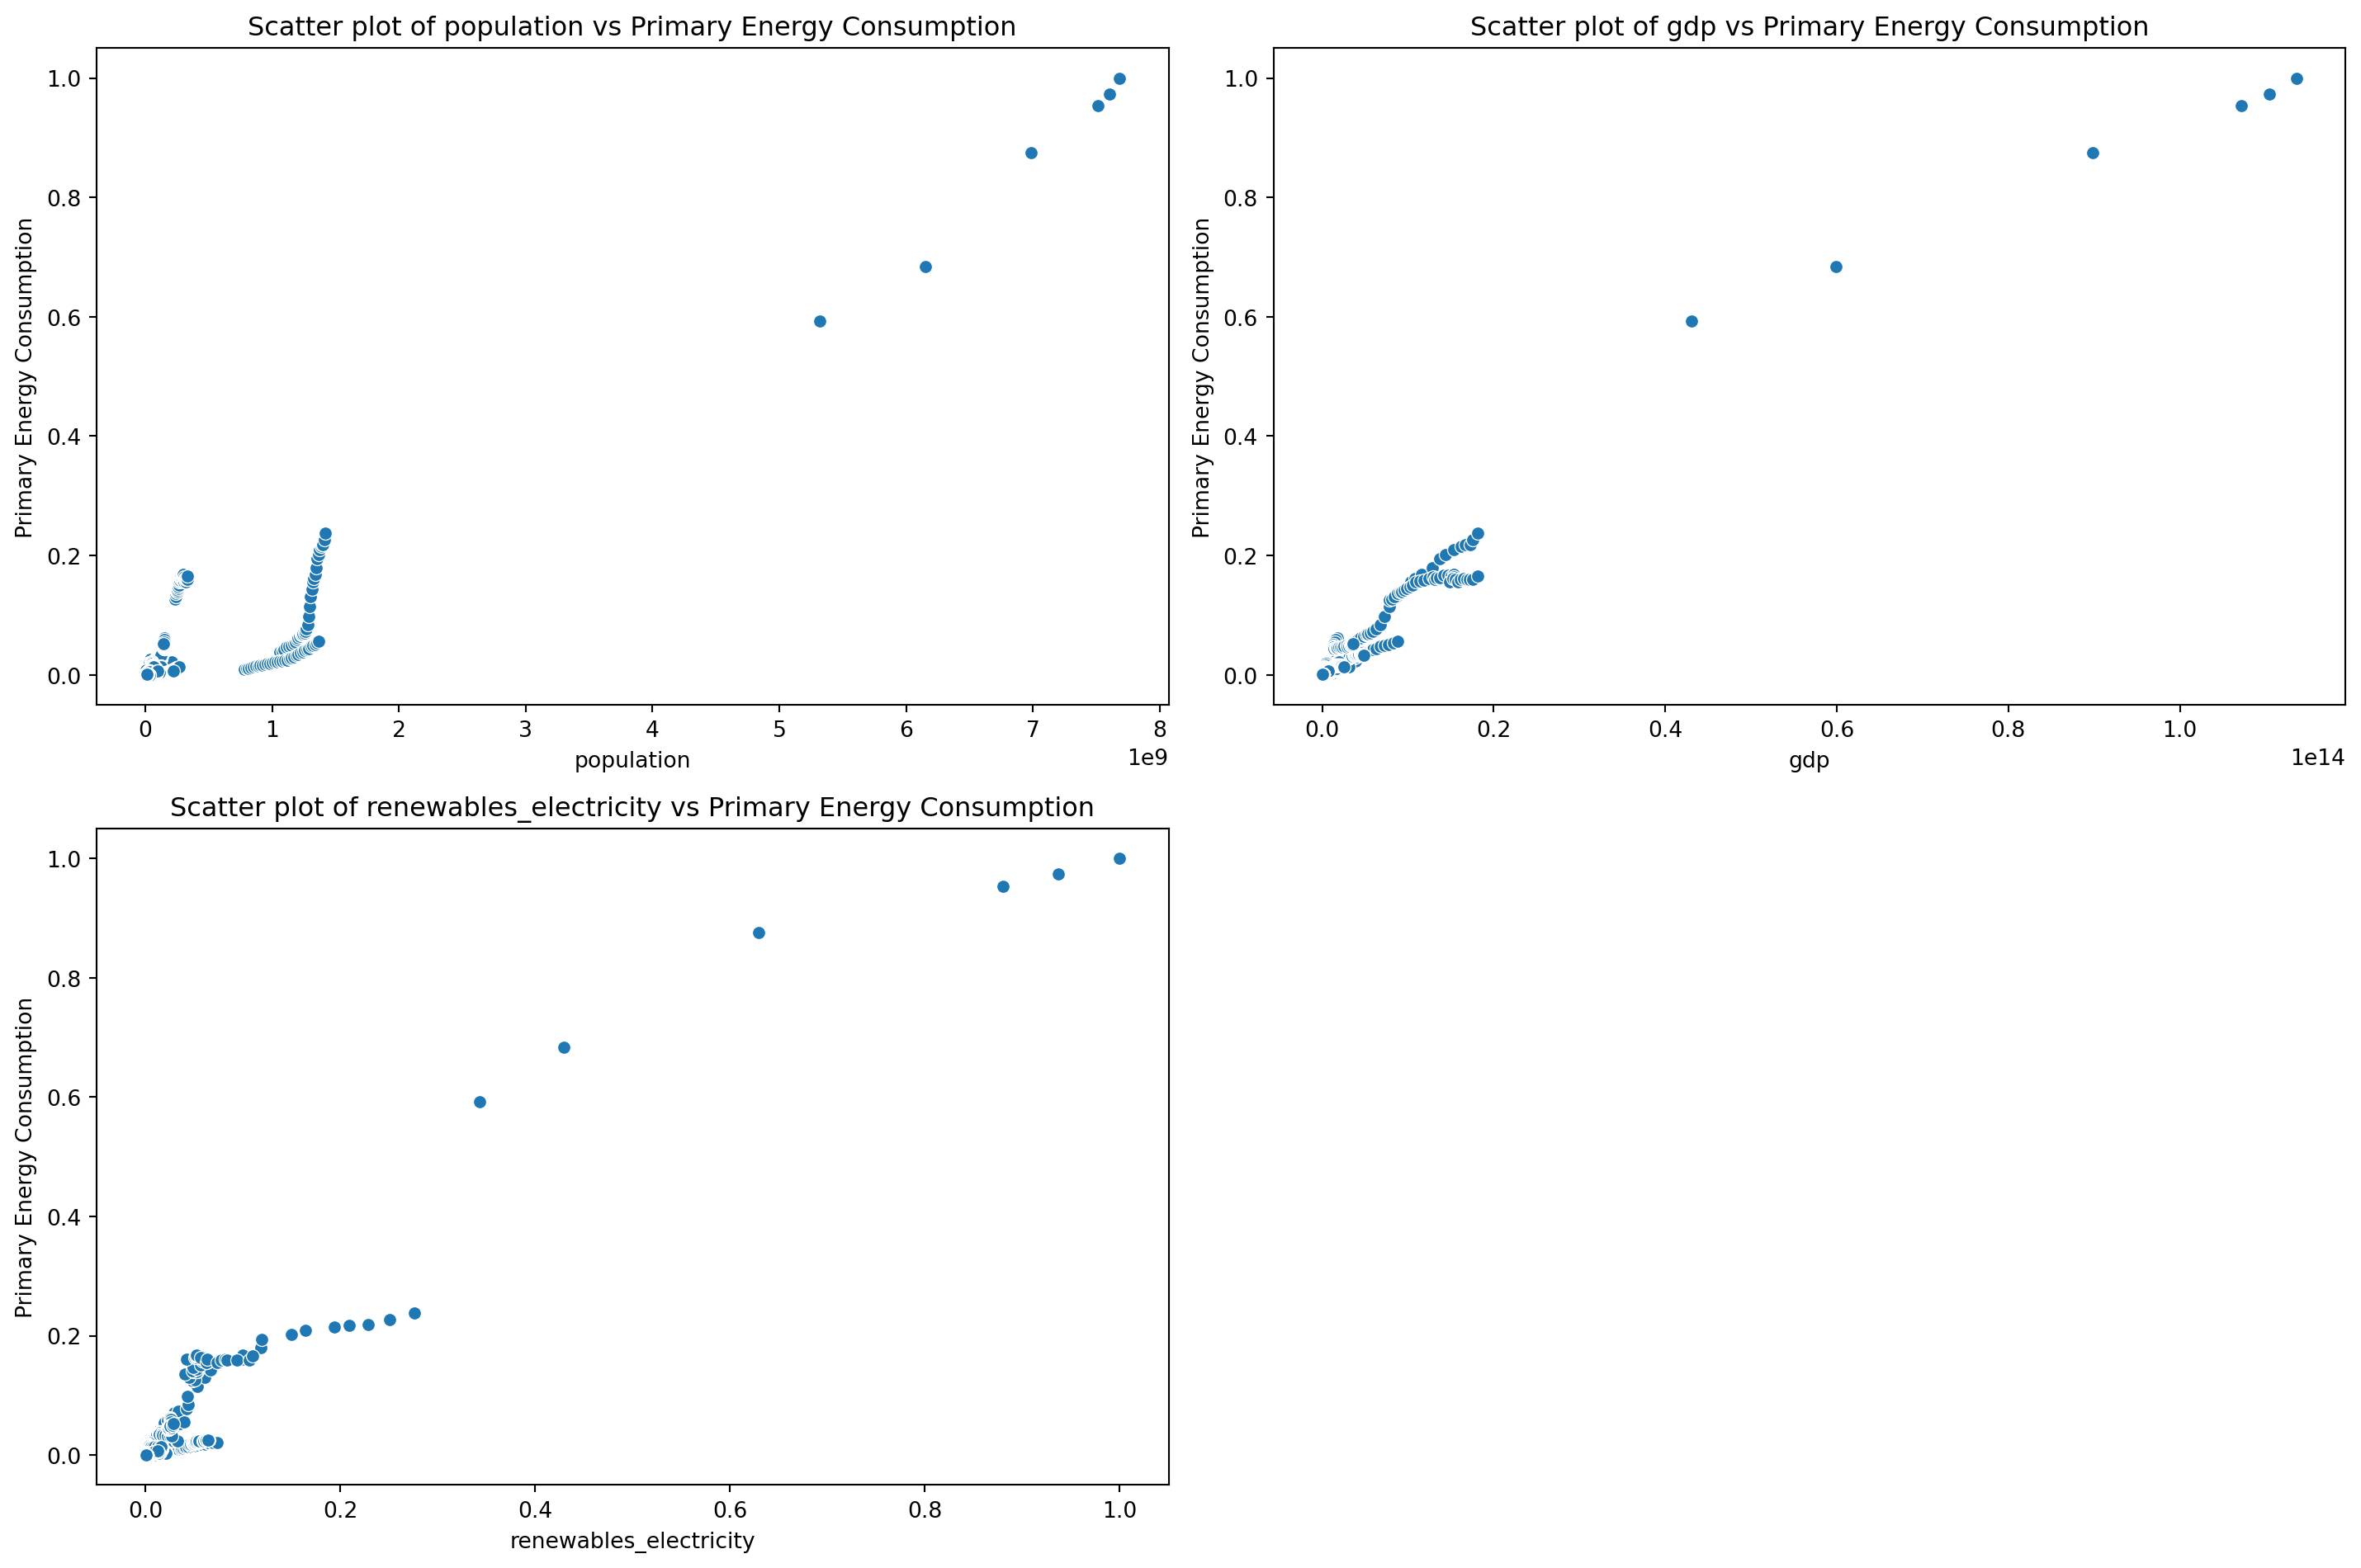

In [4]:
#| label: question_col2
#| echo: false

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/q1_energy_data_processed.csv')

# Plotting pairplot of relevant columns
sns.pairplot(data[['population', 'gdp', 'renewables_electricity', 'primary_energy_consumption']])
plt.title('Pairplot of Features and Target Variable')
plt.show()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[['population', 'gdp', 'renewables_electricity', 'primary_energy_consumption']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plotting scatter plots of features against target variable
plt.figure(figsize=(15, 10))

# Loop through each feature and plot against the target variable
for i, column in enumerate(['population', 'gdp', 'renewables_electricity']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=column, y='primary_energy_consumption', data=data)
    plt.title(f'Scatter plot of {column} vs Primary Energy Consumption')
    plt.xlabel(column)
    plt.ylabel('Primary Energy Consumption')

plt.tight_layout()
plt.show()

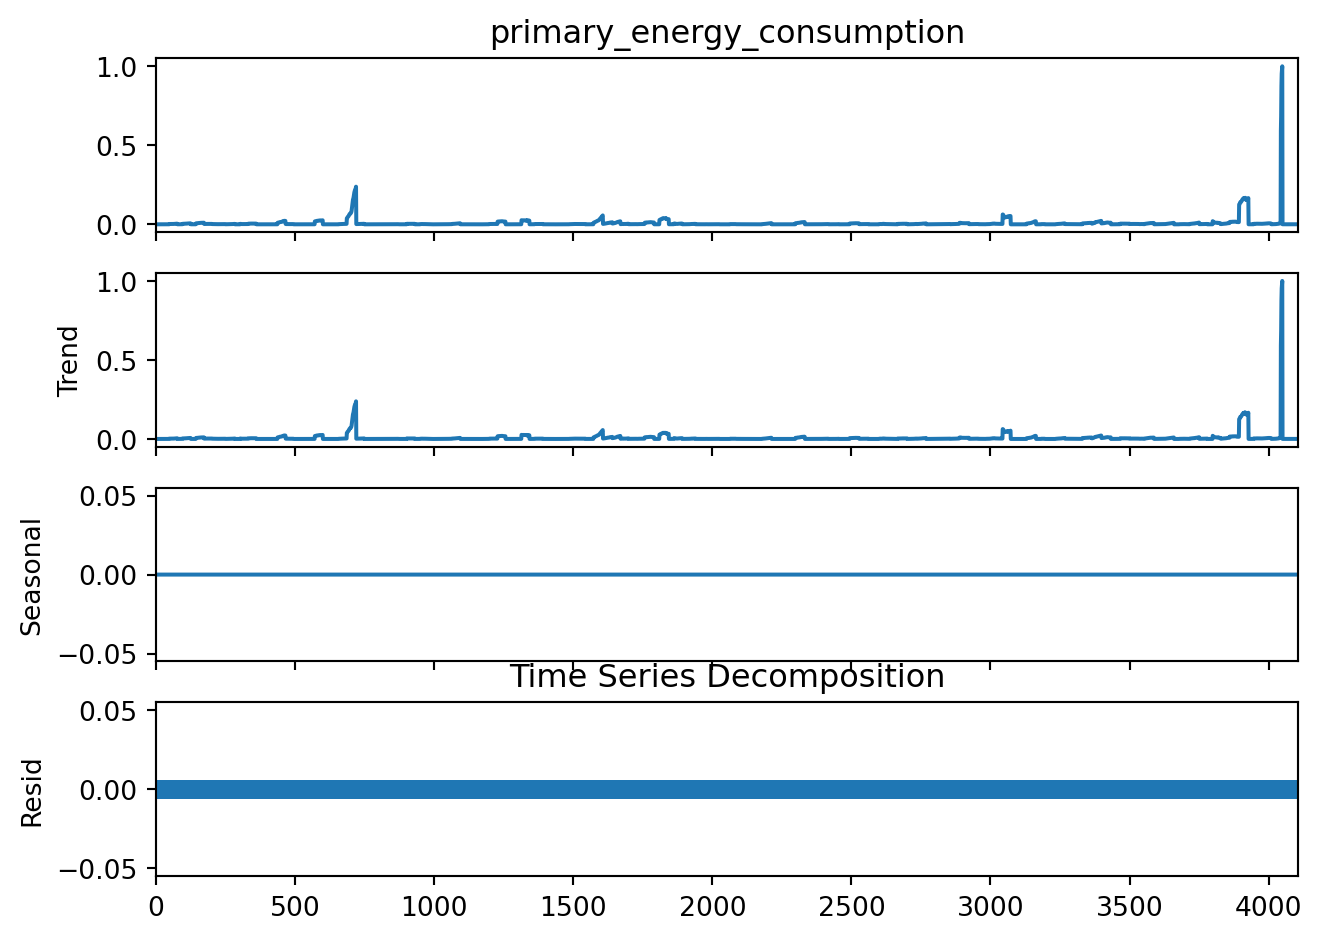

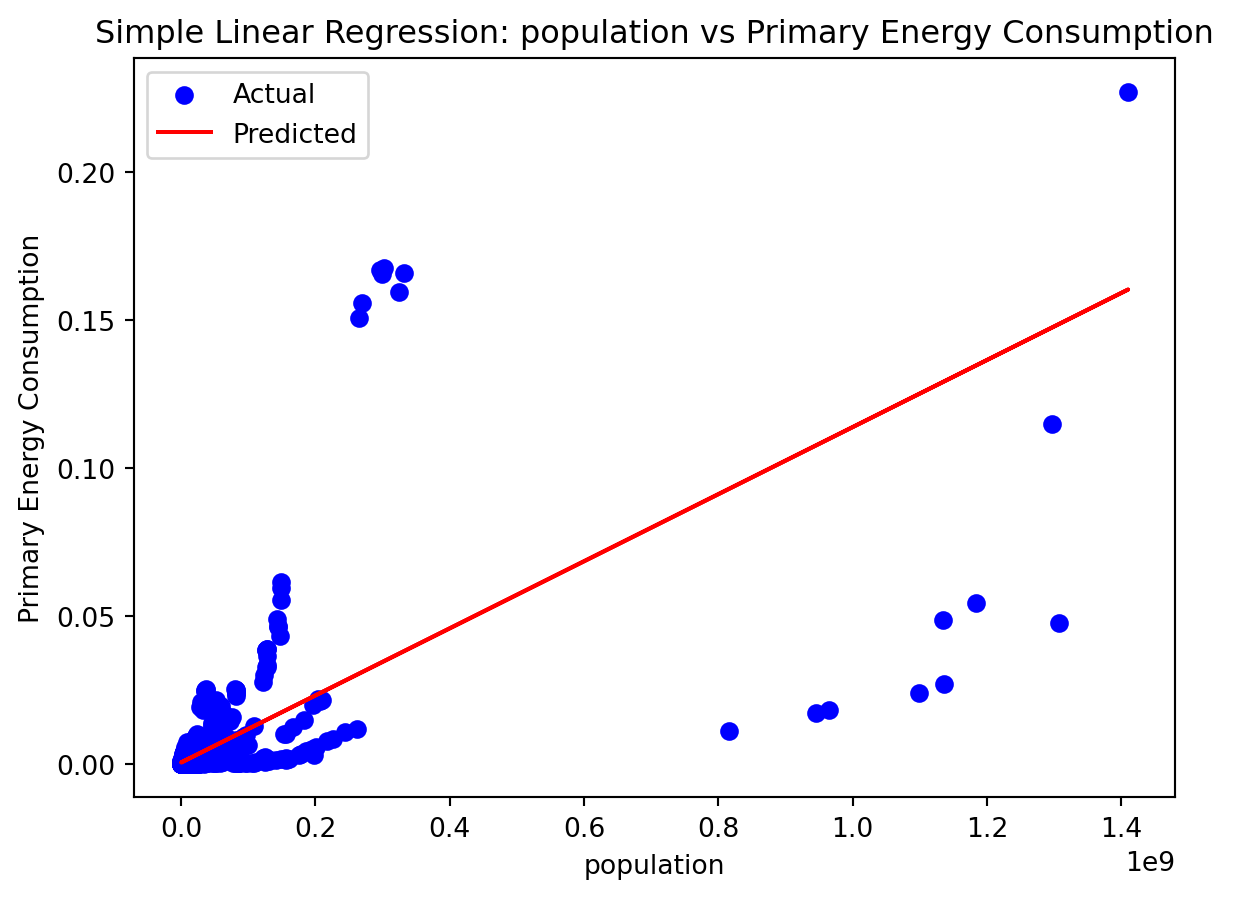

Mean Squared Error: 0.000261923447842426


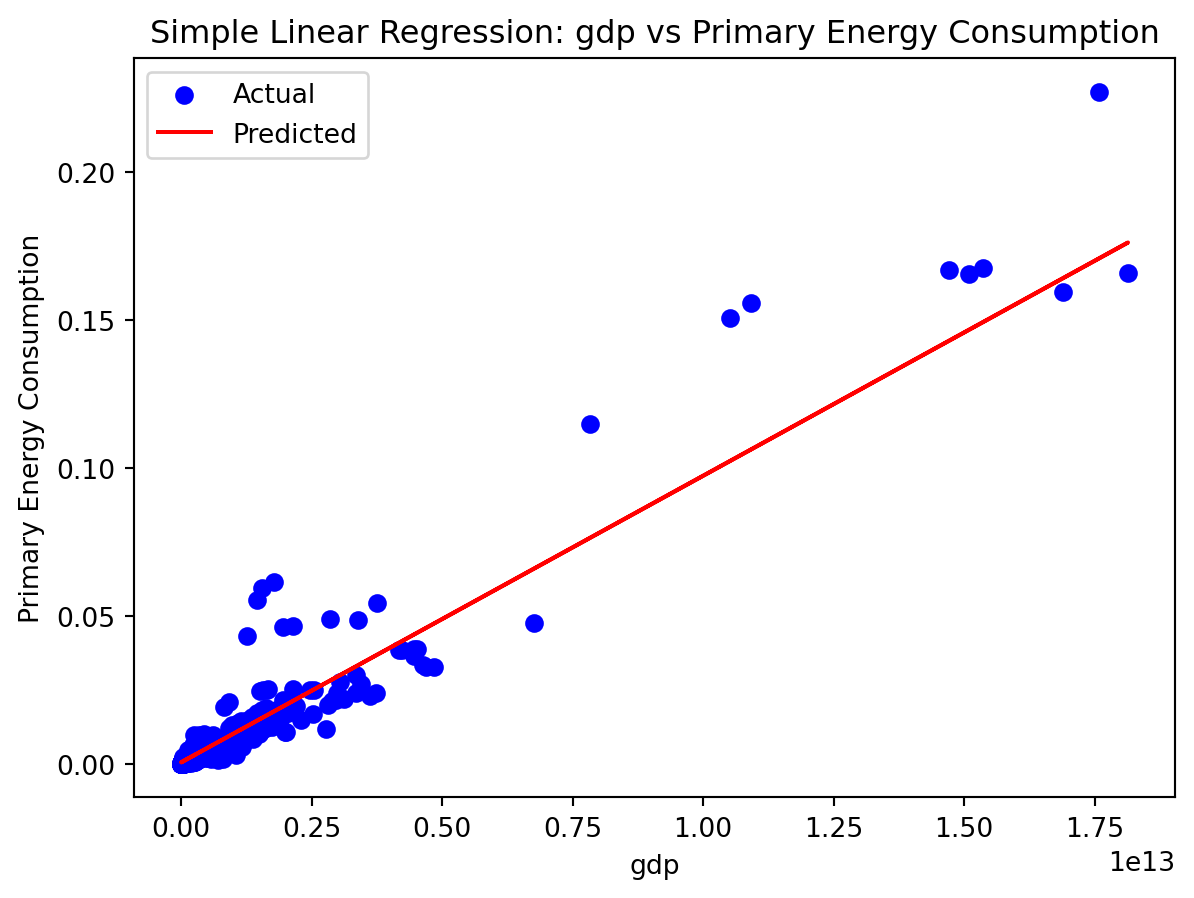

Mean Squared Error: 2.937309271249316e-05


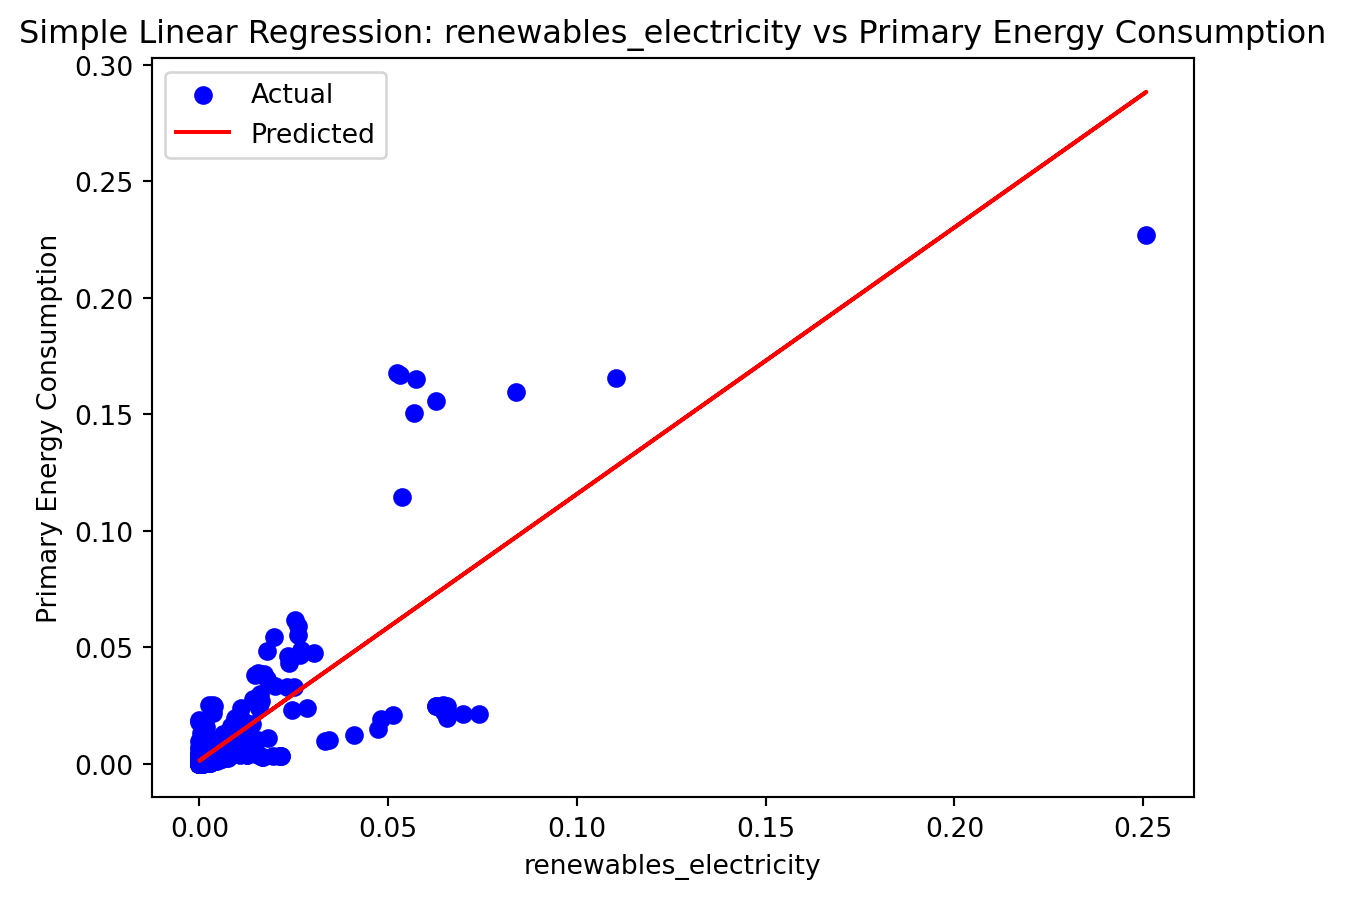

Mean Squared Error: 0.0001313336189156295
Mean Squared Error (Multiple Regression): 3.203271840932969e-05


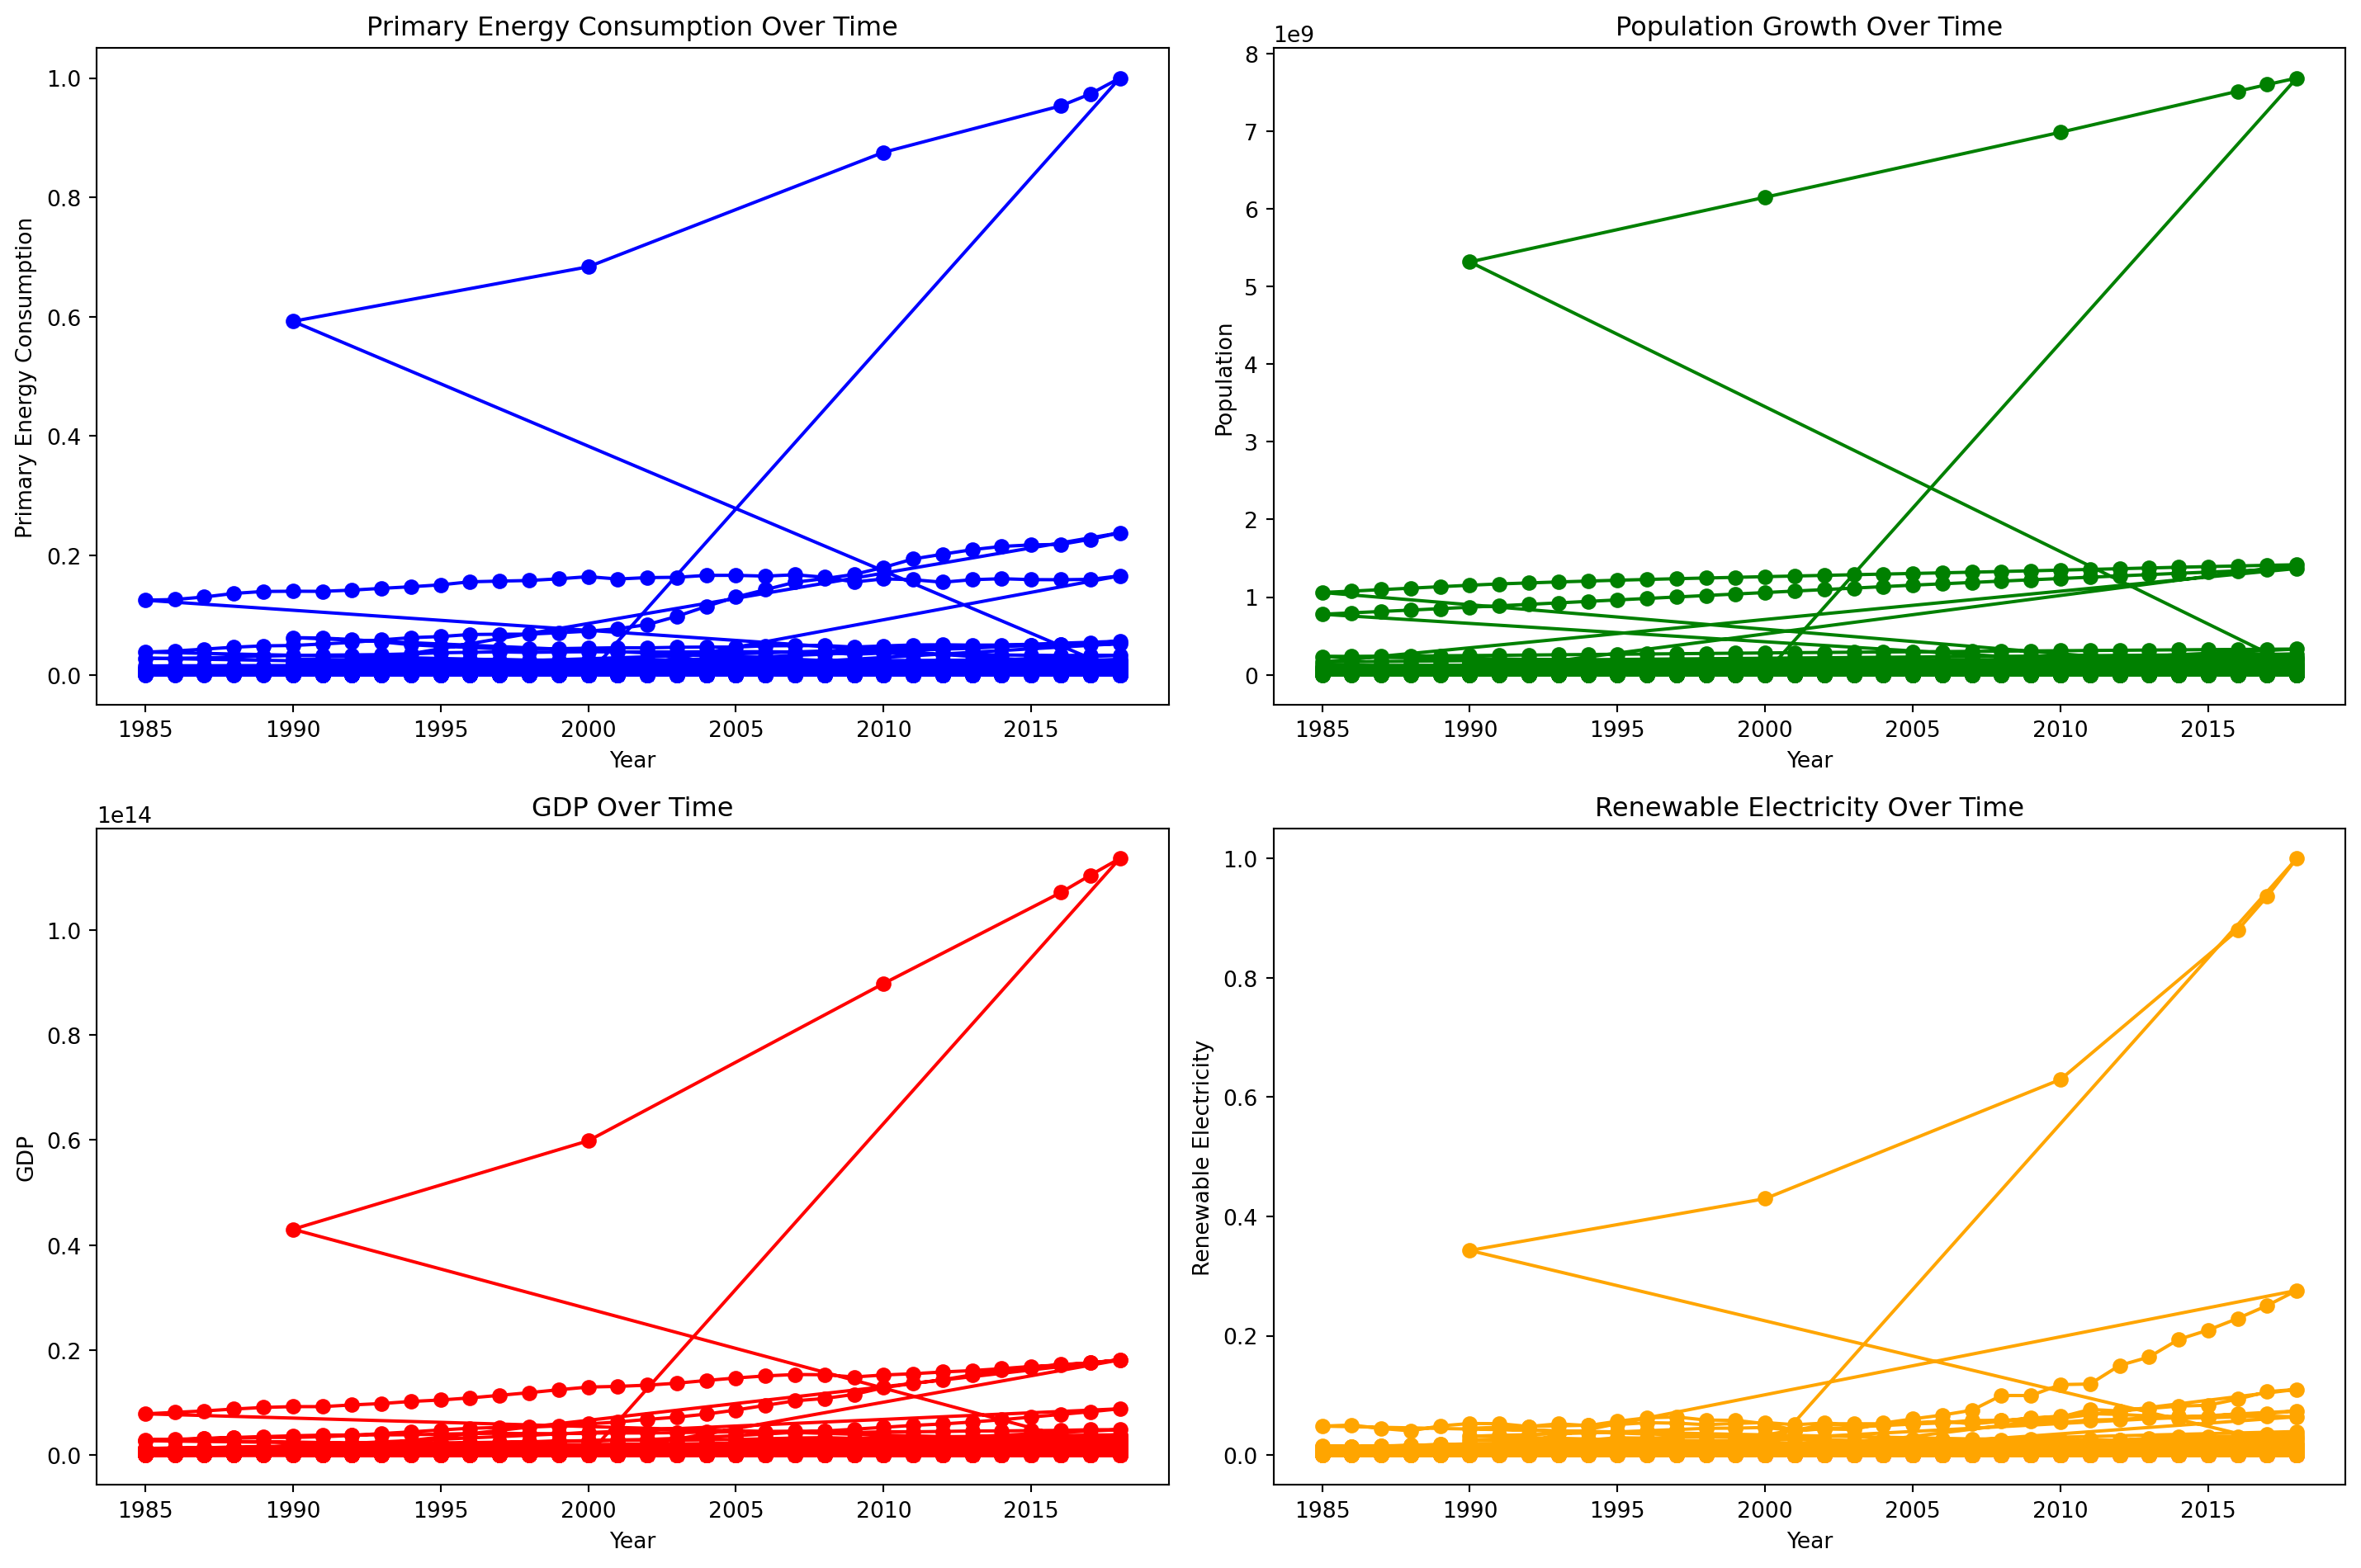

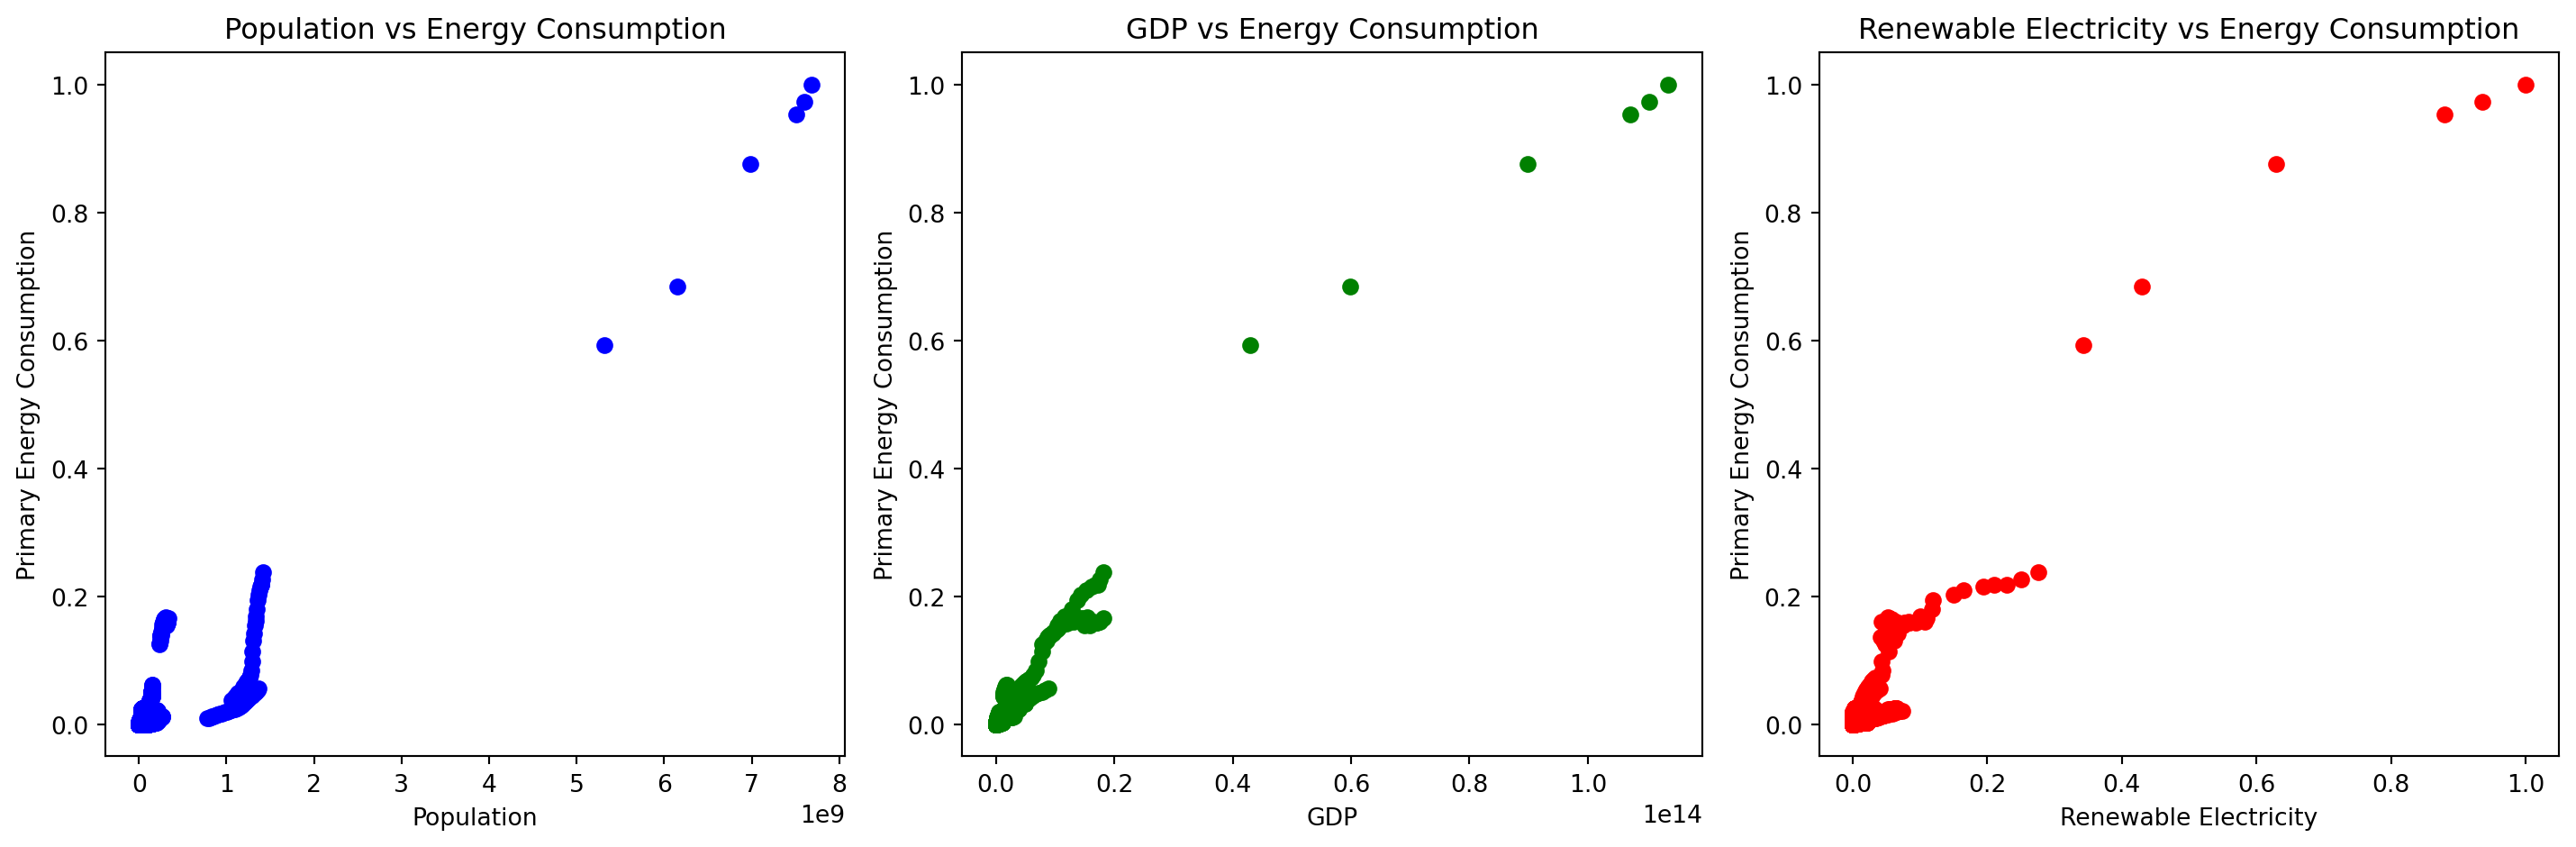

Model: Population vs Energy Consumption
R-squared: 0.3531414344090452
RMSE: 0.016184049179436708
------------------
Model: Gdp vs Energy Consumption
R-squared: 0.9306708673762983
RMSE: 0.0054196948910887185
------------------
Model: Renewables_electricity vs Energy Consumption
R-squared: 0.6549275418223406
RMSE: 0.011460088084985625
------------------
Multiple Regression Model:
R-squared: 0.9273399797855412
RMSE: 0.005659745436795695


C:\Users\ual-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\ual-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\ual-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\ual-laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecat

In [5]:
#| label: Time_series
#| echo: false
#| warning: false

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load the dataset
q1_energy_data = pd.read_csv('data/q1_energy_data_processed.csv')

# Time Series Analysis
# Decompose time series data to analyze trends, seasonality, and residuals
decomposition = seasonal_decompose(q1_energy_data['primary_energy_consumption'], model='additive', period=1)
decomposition.plot()
plt.title('Time Series Decomposition')
plt.show()

# Regression Analysis
# Function to perform linear regression and plot the results
def perform_linear_regression(x, y, x_label):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train.values.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.values.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    
    plt.scatter(x_test, y_test, color='blue', label='Actual')
    plt.plot(x_test, y_pred, color='red', label='Predicted')
    plt.title(f'Simple Linear Regression: {x_label} vs Primary Energy Consumption')
    plt.xlabel(x_label)
    plt.ylabel('Primary Energy Consumption')
    plt.legend()
    plt.show()
    
    print(f'Mean Squared Error: {mse}')

# Perform linear regression for each independent variable
for column in ['population', 'gdp', 'renewables_electricity']:
    perform_linear_regression(q1_energy_data[column], q1_energy_data['primary_energy_consumption'], column)

# Multiple Regression
# Combine multiple independent variables and perform regression
X = q1_energy_data[['population', 'gdp', 'renewables_electricity']]
y = q1_energy_data['primary_energy_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Multiple Regression): {mse}')


####
# Line Graphs for Time Series Data
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(q1_energy_data['year'], q1_energy_data['primary_energy_consumption'], marker='o', color='blue')
plt.title('Primary Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption')

plt.subplot(2, 2, 2)
plt.plot(q1_energy_data['year'], q1_energy_data['population'], marker='o', color='green')
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')

plt.subplot(2, 2, 3)
plt.plot(q1_energy_data['year'], q1_energy_data['gdp'], marker='o', color='red')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.subplot(2, 2, 4)
plt.plot(q1_energy_data['year'], q1_energy_data['renewables_electricity'], marker='o', color='orange')
plt.title('Renewable Electricity Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity')

plt.tight_layout()
plt.show()

# Scatterplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(q1_energy_data['population'], q1_energy_data['primary_energy_consumption'], color='blue')
plt.title('Population vs Energy Consumption')
plt.xlabel('Population')
plt.ylabel('Primary Energy Consumption')

plt.subplot(1, 3, 2)
plt.scatter(q1_energy_data['gdp'], q1_energy_data['primary_energy_consumption'], color='green')
plt.title('GDP vs Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Primary Energy Consumption')

plt.subplot(1, 3, 3)
plt.scatter(q1_energy_data['renewables_electricity'], q1_energy_data['primary_energy_consumption'], color='red')
plt.title('Renewable Electricity vs Energy Consumption')
plt.xlabel('Renewable Electricity')
plt.ylabel('Primary Energy Consumption')

plt.tight_layout()
plt.show()

# Model Evaluation
# Metrics for Simple Linear Regression
# R-squared and RMSE
def evaluate_model(true, pred):
    r_squared = sm.OLS(true, pred).fit().rsquared
    rmse = mean_squared_error(true, pred, squared=False)
    return r_squared, rmse

# Evaluate each simple linear regression model
for column in ['population', 'gdp', 'renewables_electricity']:
    X = q1_energy_data[column].values.reshape(-1, 1)
    y = q1_energy_data['primary_energy_consumption']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared, rmse = evaluate_model(y_test, y_pred)
    print(f'Model: {column.capitalize()} vs Energy Consumption')
    print(f'R-squared: {r_squared}')
    print(f'RMSE: {rmse}')
    print('------------------')

# Metrics for Multiple Regression
X = q1_energy_data[['population', 'gdp', 'renewables_electricity']]
y = q1_energy_data['primary_energy_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared, rmse = evaluate_model(y_test, y_pred)
print('Multiple Regression Model:')
print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

# Repo Organization

The following folders comprise the project repository

-   **.github/:** This directory is designated for files associated with GitHub, encompassing workflows, actions, and templates tailored for issues.

-   **\_extra/:** Reserved for miscellaneous files that don't neatly fit into other project categories, providing a catch-all space for various supplementary documents.

-   **\_freeze/:** Within this directory lie frozen environment files containing comprehensive information regarding the project's environment configuration and dependencies.

-   **data/:** Specifically allocated for storing i data files crucial for the project's functionality, encompassing input files, datasets, and other essential data resources.

-   **images/:** Serving as a repository for visual assets employed throughout the project, including diagrams, charts, and screenshots, this directory maintains visual elements integral to project documentation and presentation.

-   **.gitignore:** This file functions to specify exclusions from version control, ensuring that designated files and directories remain untracked by Git, thus streamlining the versioning process.

-   **README.md:** Serving as the primary hub of project information, this README document furnishes essential details encompassing project setup, usage instructions, and an overarching overview of project objectives and scope.

-   **\_quarto.yml:** Acting as a pivotal configuration file for Quarto, this document encapsulates various settings and options governing the construction and rendering of Quarto documents, facilitating customization and control over document output.

-   **about.qmd:** This Quarto Markdown file supplements project documentation by providing additional contextual information, elucidating project purpose, contributor insights, and other pertinent project details.

-   **index.qmd:** index.qmd: This serves as the main documentation page for our project. This Quarto Markdown file provides detailed descriptions of our project, including all code and visualization .